<a href="https://colab.research.google.com/github/MarshallPotts/CSE450-Machine-Learning/blob/main/vehicle_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
'''

from google.colab import drive
drive.mount('/content/drive')

'''

"\n\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n"

In [163]:
'''

import shutil
import os

plane_dir = "/content/Airplane"
bic_dir = "/content/Bics"
bus_dir = "/content/bus"
car_dir = "/content/Cars"
heli_dir = "/content/Helicopter"
moto_dir = "/content/Motocycles"
train_dir = "/content/Train"
truck_dir = "/content/Truck"

if os.path.exists(plane_dir):
    shutil.rmtree(plane_dir)
    print(f"Deleted directory: {plane_dir}")
else:
    print(f"Directory not found: {plane_dir}")

if os.path.exists(bic_dir):
    shutil.rmtree(bic_dir)
    print(f"Deleted directory: {bic_dir}")
else:
    print(f"Directory not found: {bic_dir}")

if os.path.exists(bus_dir):
    shutil.rmtree(bus_dir)
    print(f"Deleted directory: {bus_dir}")
else:
    print(f"Directory not found: {bus_dir}")

if os.path.exists(car_dir):
    shutil.rmtree(car_dir)
    print(f"Deleted directory: {car_dir}")
else:
    print(f"Directory not found: {car_dir}")

if os.path.exists(heli_dir):
    shutil.rmtree(heli_dir)
    print(f"Deleted directory: {heli_dir}")
else:
    print(f"Directory not found: {heli_dir}")

if os.path.exists(moto_dir):
    shutil.rmtree(moto_dir)
    print(f"Deleted directory: {moto_dir}")
else:
    print(f"Directory not found: {moto_dir}")

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
    print(f"Deleted directory: {train_dir}")
else:
    print(f"Directory not found: {train_dir}")

if os.path.exists(truck_dir):
    shutil.rmtree(truck_dir)
    print(f"Deleted directory: {truck_dir}")
else:
    print(f"Directory not found: {truck_dir}")



# unzip the dataset files from google drive
!unzip "/content/drive/MyDrive/ML/archive.zip" -d "/content"
'''

'\n\nimport shutil\nimport os\n \nplane_dir = "/content/Airplane"\nbic_dir = "/content/Bics"\nbus_dir = "/content/bus"\ncar_dir = "/content/Cars"\nheli_dir = "/content/Helicopter"\nmoto_dir = "/content/Motocycles"\ntrain_dir = "/content/Train"\ntruck_dir = "/content/Truck"\n\nif os.path.exists(plane_dir):\n    shutil.rmtree(plane_dir)\n    print(f"Deleted directory: {plane_dir}")\nelse:\n    print(f"Directory not found: {plane_dir}")\n\nif os.path.exists(bic_dir):\n    shutil.rmtree(bic_dir)\n    print(f"Deleted directory: {bic_dir}")\nelse:\n    print(f"Directory not found: {bic_dir}")\n\nif os.path.exists(bus_dir):\n    shutil.rmtree(bus_dir)\n    print(f"Deleted directory: {bus_dir}")\nelse:\n    print(f"Directory not found: {bus_dir}")   \n\nif os.path.exists(car_dir):\n    shutil.rmtree(car_dir)\n    print(f"Deleted directory: {car_dir}")\nelse:\n    print(f"Directory not found: {car_dir}")    \n\nif os.path.exists(heli_dir):\n    shutil.rmtree(heli_dir)\n    print(f"Deleted direc

Define dataset class and __getitem__

In [164]:
import torch
import torchaudio
import torchaudio.transforms as T
from torchaudio.transforms import MFCC
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from imblearn.over_sampling import SMOTE


Load Dataframe with file paths and labels

In [165]:
# read in each file name in order from the subdirectory
# create datafram with a column for label and a column for file path

# Define the root directory containing the subdirectories
root_dir = "/content/"  # Update with your actual root directory

# Create empty lists to store file paths and labels
audio_paths = []
audio_labels = []

# Loop through each subdirectory in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)

    # Check if the current item is a directory
    if os.path.isdir(subdir_path):
        # Loop through each file in the subdirectory
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file)

            # Check if the file is a .wav file
            if file.endswith(".wav"):
                audio_paths.append(file_path)
                audio_labels.append(subdir)  # Use subdirectory name as label

# Create a pandas DataFrame from the collected data
df = pd.DataFrame({"file_path": audio_paths, "class": audio_labels})

# Print the DataFrame to see the results (optional)
print(df)


                                              file_path       class
0     /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
1     /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
2     /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
3          /content/Motocycles/MOTORCYCLE_SOUNDS_17.wav  Motocycles
4     /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
...                                                 ...         ...
9443  /content/bus/▶️_Bus_Sound_Effect._Bus_Ambience...         bus
9444  /content/bus/▶️_Bus_Sound_Effect._Bus_Ambience...         bus
9445  /content/bus/▶️_Bus_Sound_Effect._Bus_Ambience...         bus
9446  /content/bus/▶️_Bus_Sound_Effect._Bus_Ambience...         bus
9447  /content/bus/▶️_Bus_Sound_Effect._Bus_Ambience...         bus

[9448 rows x 2 columns]


In [166]:
# remove contruction, tractors from trucks category
# remove chainsaw from motorcycles

df = df[~df['file_path'].str.contains('construction')]
df = df[~df['file_path'].str.contains('tractor')]
df = df[~df['file_path'].str.contains('chainsaw')]

print(df[df['class']=='Motocycles'])
print(df[df['class']=='Truck'])

                                             file_path       class
0    /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
1    /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
2    /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
3         /content/Motocycles/MOTORCYCLE_SOUNDS_17.wav  Motocycles
4    /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
..                                                 ...         ...
531  /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
532  /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
534  /content/Motocycles/MOTORCYCLE_RIDE_SOUND_EFFE...  Motocycles
535  /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles
536  /content/Motocycles/BIKERS_100___Best_of_Super...  Motocycles

[508 rows x 2 columns]
                                              file_path  class
2180  /content/Truck/Best_Of_American_Trucks___Sound...  Truck
2181  /content/Truck/Best_Of_American_Trucks__

In [167]:
# output to Dataframe to see the changes

df.to_csv('files_and_classes.csv', index=False)

Dataset Class

In [168]:
'''
********************************************************************************************************************************************************
********************************************************************************************************************************************************
***THIS CODE WORKED BEFORE TRYING TO TRAIN***
********************************************************************************************************************************************************
********************************************************************************************************************************************************
class audio_ds(Dataset):
  def __init__(self, df, data_path):
    self.df = df    # dataframe storing the filepath and labels passed into the dataset when creating
    self.data_path = data_path    # file path to the data
    self.sr = 44100   # sample rate of all the audio
    self.spectogram_transform = T.Spectrogram(n_fft=1024, hop_length=512, normalized=True, onesided=True)   #normalize to the window and onesided to reduce redundancy

  def __len__(self):
    return len(self.df)


  def __getitem__(self, idx):
    # get the file path and label from the dataframe
    file_path = self.df.iloc[idx, 'file_path']
    label = self.df.iloc[idx, 'class']

    # Load audio with expected sample rate
    audio_file, sample_rate = torchaudio.load(file_path)
    if sample_rate != self.sr:  # Resample if necessary
        resample_transform = T.Resample(sample_rate, self.sr)
        audio_file = resample_transform(audio_file)

    spectogram = self.spectogram_transform(audio_file)

    return spectogram, label

    '''

class audio_ds(Dataset):
  def __init__(self, df, data_path):
    self.df = df    # dataframe storing the filepath and labels passed into the dataset when creating
    self.data_path = data_path    # file path to the data
    self.sr = 44100   # sample rate of all the audio
    self.spectogram_transform = T.Spectrogram(n_fft=1024, hop_length=512, normalized=True, onesided=True)   #normalize to the window and onesided to reduce redundancy
    # Create a dictionary to map class labels to numerical indices
    self.class_to_index = {cls: i for i, cls in enumerate(df['class'].unique())}

  def __len__(self):
    return len(self.df)


  def __getitem__(self, idx):
    # get the file path and label from the dataframe
    # the following lines are changed to fix the error.
    # The original line was: file_path = self.df.iloc[idx, 'file_path']
    # The problem was that random_split creates subsets using indices, which might not be simple integers.
    # Using .iloc[idx] directly will handle various index types correctly
    row = self.df.iloc[idx]
    file_path = row['file_path']
    label = row['class']

    # Load audio with expected sample rate
    audio_file, sample_rate = torchaudio.load(file_path)
    if sample_rate != self.sr:  # Resample if necessary
        resample_transform = T.Resample(sample_rate, self.sr)
        audio_file = resample_transform(audio_file)

    spectogram = self.spectogram_transform(audio_file)

    # Convert label to numerical index using the dictionary
    label = self.class_to_index[label]
    return spectogram, torch.tensor(label, dtype=torch.long) # return label as a tensor


Create dataset and split

In [169]:
root_dir = "/content/"
vehicle_ds = audio_ds(df, root_dir)

# Random split of 80:20 between training and validation
num_items = len(vehicle_ds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(vehicle_ds, [num_train, num_val])



Oversample with SMOTE

In [170]:
#create dataloaders
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)

Visualize

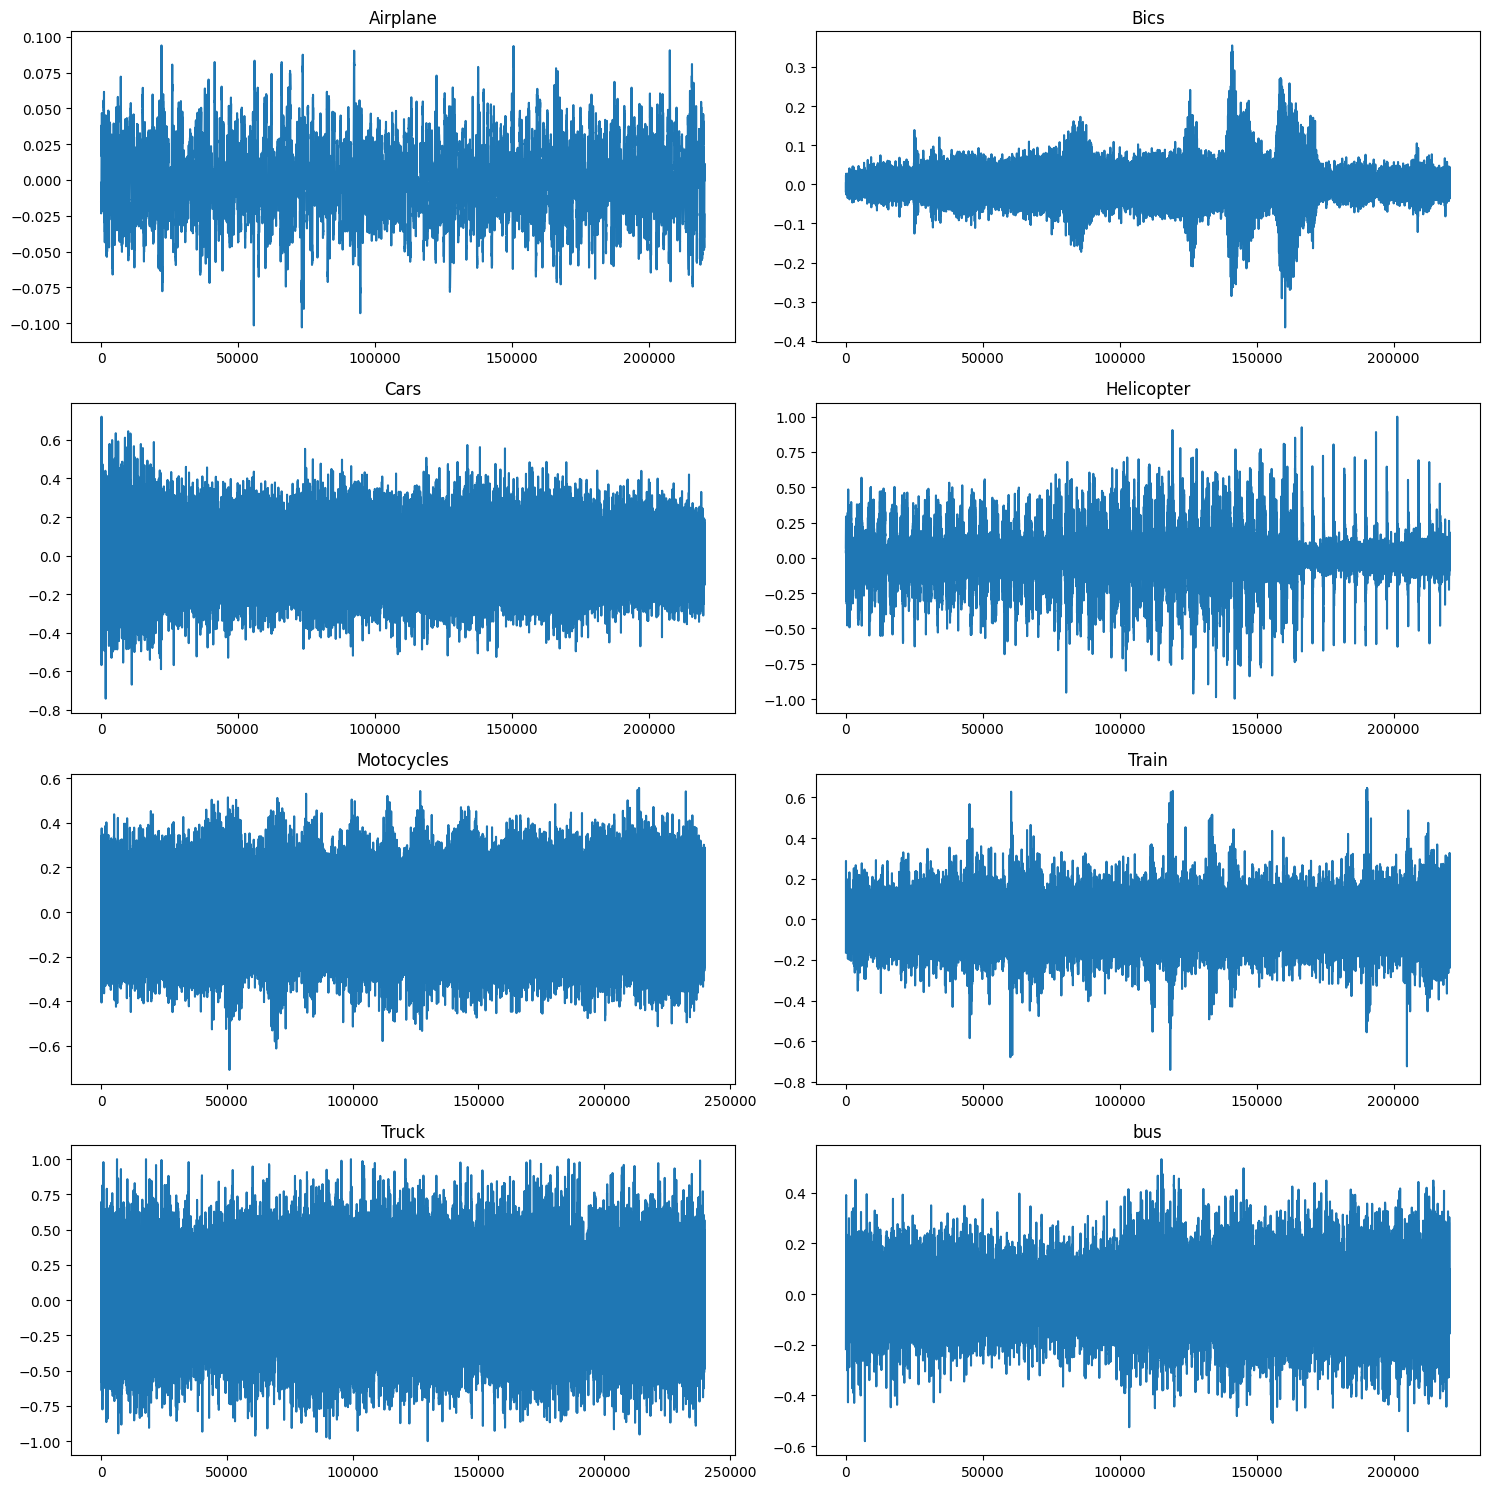

In [171]:
# Randomly select one sample of each class
random_samples = df.groupby('class').sample(1)
audio_samples, labels = random_samples['file_path'].tolist(), random_samples['class'].tolist()

# Visualize the waveforms
fig, axs = plt.subplots(4, 2, figsize=(15, 15))  # Adjusted grid for 8 classes (4 rows, 2 columns)
axs = axs.flatten()  # Flatten the axes for easier iteration
for ax, audio_path, label in zip(axs, audio_samples, labels):
    audio_file, sample_rate = torchaudio.load(audio_path)
    # Assuming audio_file is a 2D tensor (channels, samples)
    # Select the first channel for plotting
    waveform = audio_file[0, :].numpy()  # Convert to NumPy array
    ax.plot(waveform)
    ax.set_title(f'{label}')

fig.tight_layout()
plt.show()

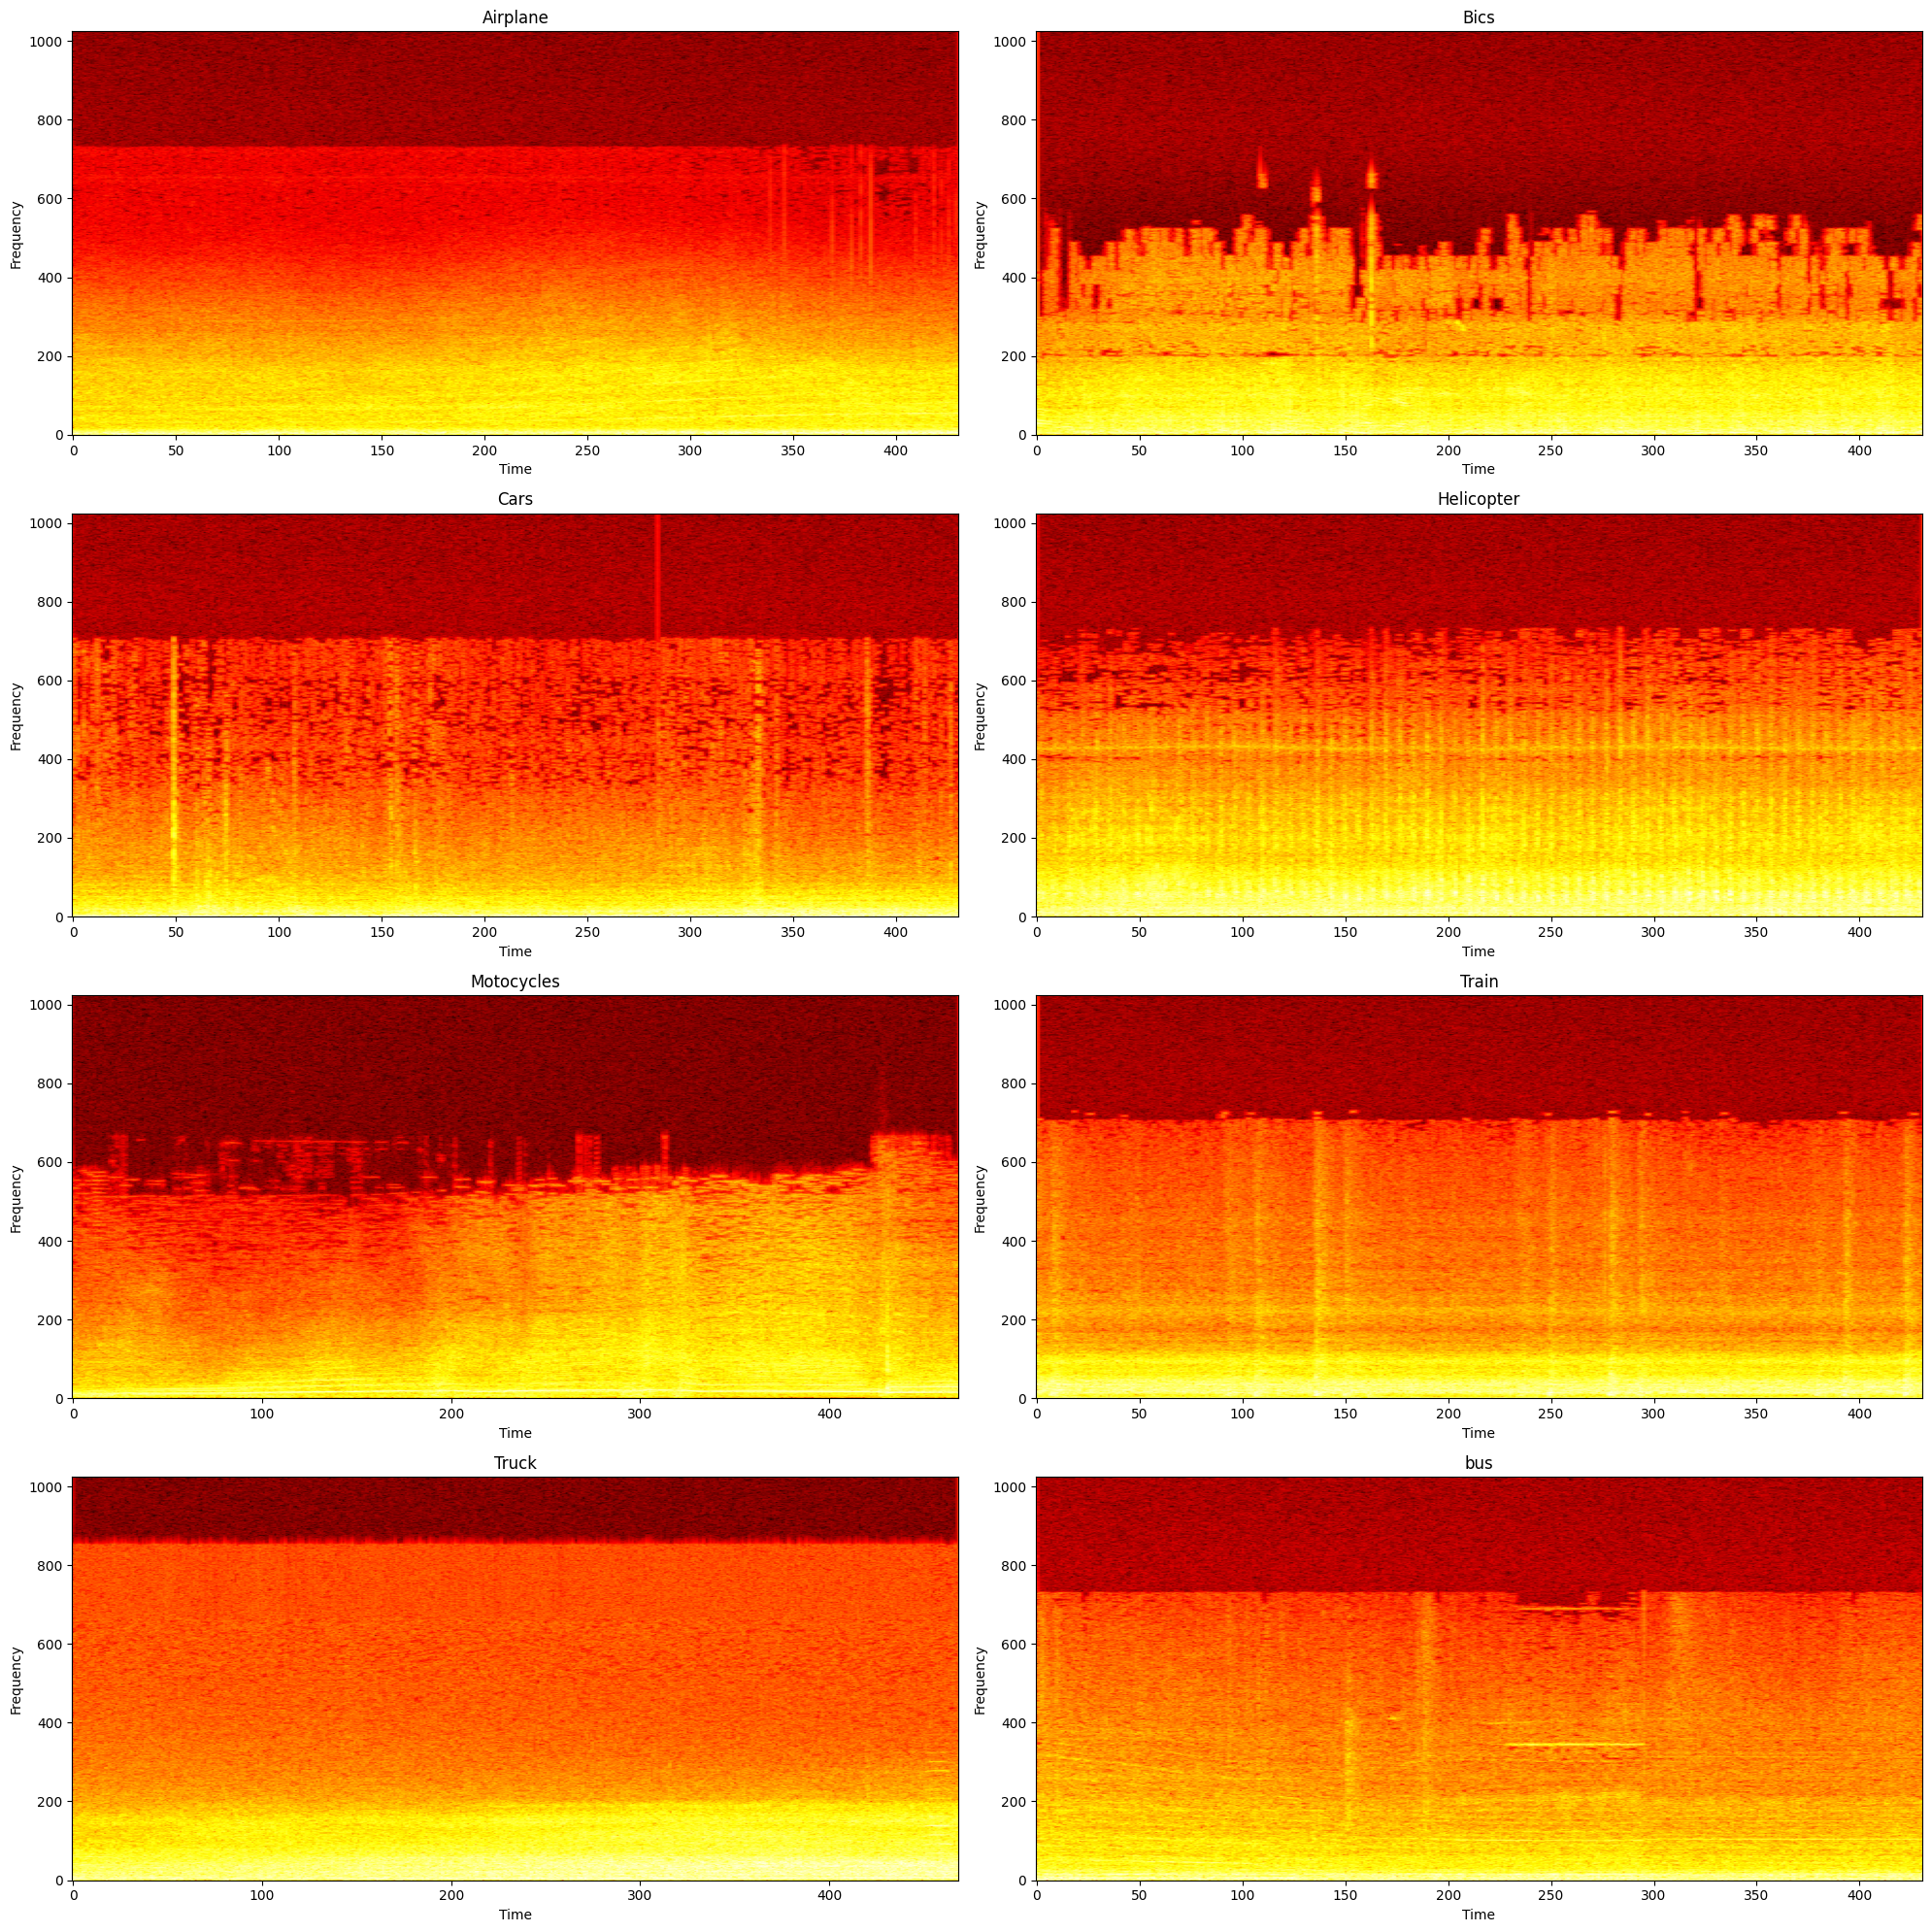

In [172]:

# Randomly select one sample of each class
random_samples = df.groupby('class').sample(1)
audio_samples, labels = random_samples['file_path'].tolist(), random_samples['class'].tolist()

# Spectrogram parameters
n_fft = 2048
hop_length = 512

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(20, 20))  # Adjusted for 8 classes
axs = axs.flatten()

for ax, audio_path, label in zip(axs, audio_samples, labels):
    audio_file, sample_rate = torchaudio.load(audio_path)

    # Create spectrogram using torchaudio
    transform = T.Spectrogram(n_fft=n_fft, hop_length=hop_length)
    spectrogram = transform(audio_file)

    # Convert to decibels
    # The line below is changed to call AmplitudeToDB with the spectrogram data
    spectrogram_db = T.AmplitudeToDB()(spectrogram)

    # Display the spectrogram
    # Assuming spectrogram is a 2D tensor (frequency, time)
    # Select the first channel for plotting if it's multi-channel
    # The line below is changed to use the decibel spectrogram
    spectrogram_np = spectrogram_db[0, :].numpy() if spectrogram_db.dim() > 2 else spectrogram_db.numpy()
    ax.imshow(spectrogram_np, cmap='hot', origin='lower', aspect='auto')
    ax.set_title(f'{label}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')

fig.tight_layout()
plt.show()

Create a Model

In [173]:
import torch.nn as nn
import torch.nn.init as init

# Define the CONFIG dictionary
CONFIG = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'epochs': 10  # You might need to adjust this based on your training needs
}

class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Second Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)

    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
model = AudioClassifier()
model = model.to(CONFIG['device']) # Now CONFIG is defined and contains the device

# Check that it is on Cuda
next(model.parameters()).device

device(type='cpu')

Training

In [174]:
from tqdm import tqdm

# Function to train one epoch
def train_one_epoch(model, dataloader, criterion, optimizer, device, evaluate_interval=50):
    model.train()
    total_loss = 0.0
    total_correct = 0
    batch_count = 0

    progress_bar = tqdm(dataloader, desc="Training", unit="batch")

    for inputs, labels in progress_bar:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        total_correct += torch.sum(predicted == labels).item()

        # Accumulate loss
        total_loss += loss.item() * inputs.size(0)

        # Update progress bar
        progress_bar.set_postfix({"Loss": loss.item()})

    # Compute epoch metrics
    epoch_loss = total_loss / len(dataloader.dataset)
    epoch_acc = total_correct / len(dataloader.dataset)

    return epoch_loss, epoch_acc

# Function to train the model
def train_model(model, train_dataloader, val_dataloader, criterion, optimizer, num_epochs, device):
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        # Train one epoch
        train_loss, train_acc = train_one_epoch(model, train_dataloader, criterion, optimizer, device)

        # Evaluate on validation set
        val_loss, val_acc = evaluate_model(model, val_dataloader, criterion, device)

        # Print epoch results
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"  Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.4f}")
        print(f"  Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f}")

        # Save the best model based on validation accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")

# Function to evaluate the model
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    total_correct = 0

    progress_bar = tqdm(dataloader, desc="Evaluation", unit="batch")

    with torch.no_grad():
        for inputs, labels in progress_bar:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            total_correct += torch.sum(predicted == labels).item()
            total_loss += loss.item() * inputs.size(0)

            progress_bar.set_postfix({"Loss": loss.item()})

    epoch_loss = total_loss / len(dataloader.dataset)
    epoch_acc = total_correct / len(dataloader.dataset)

    return epoch_loss, epoch_acc

Run the Training

In [175]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                            steps_per_epoch=int(len(train_dl)),
                                            epochs=CONFIG["epochs"],
                                            anneal_strategy='linear')
train_model(model, train_dl, val_dl, criterion, optimizer, CONFIG["epochs"], CONFIG["device"])

Training:   2%|▏         | 4/236 [00:13<12:43,  3.29s/batch, Loss=2.29]


RuntimeError: stack expects each tensor to be equal size, but got [2, 513, 431] at entry 0 and [1, 513, 431] at entry 5